In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import scipy
from statsmodels.distributions.empirical_distribution import ECDF


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pickle
with open('../Py_notebooks/static_results.pickle', 'rb') as handle:
    results = pickle.load(handle)

In [37]:
for k in results.keys():
    print(k)

('unhedged', 'unhedged')
('future', 'future')
('Gaussian', 'Variance')
('Gaussian', 'VaR 99%')
('Gaussian', 'VaR 95%')
('Gaussian', 'ES 99%')
('Gaussian', 'ES 95%')
('Gaussian', 'Spectral 10')
('t_Copula_P', 'Variance')
('t_Copula_P', 'VaR 99%')
('t_Copula_P', 'VaR 95%')
('t_Copula_P', 'ES 99%')
('t_Copula_P', 'ES 95%')
('t_Copula_P', 'Spectral 10')
('Clayton', 'Variance')
('Clayton', 'VaR 99%')
('Clayton', 'VaR 95%')
('Clayton', 'ES 99%')
('Clayton', 'ES 95%')
('Clayton', 'Spectral 10')
('Frank', 'Variance')
('Frank', 'VaR 99%')
('Frank', 'VaR 95%')
('Frank', 'ES 99%')
('Frank', 'ES 95%')
('Frank', 'Spectral 10')
('Gumbel', 'Variance')
('Gumbel', 'VaR 99%')
('Gumbel', 'VaR 95%')
('Gumbel', 'ES 99%')
('Gumbel', 'ES 95%')
('Gumbel', 'Spectral 10')
('Plackett', 'Variance')
('Plackett', 'VaR 99%')
('Plackett', 'VaR 95%')
('Plackett', 'ES 99%')
('Plackett', 'ES 95%')
('Plackett', 'Spectral 10')
('Gauss Mix Indep', 'Variance')
('Gauss Mix Indep', 'VaR 99%')
('Gauss Mix Indep', 'VaR 95%')
('

In [188]:
def SD(c1, rm1, c2, rm2, j, n_grid=2000, boxplot=False, lower=False):
    if (c1==c2) & (rm1==rm2):
        print('same')
        return 
    
    r1 = np.array(results[(c1), (rm1)])
    r2 = np.array(results[(c2), (rm2)])
    
    if lower:
        _max = 1
    else:
        _max = np.max([np.max(r1), np.max(r2)])
        
    _min = np.min([np.min(r1), np.min(r2)]) # find a common support for two incomes
    x = np.linspace(_min, _max, n_grids) # grids

    ecdf1 = ECDF(r1)
    ecdf2 = ECDF(r2)

    S1_1 = ecdf1(x)
    S1_2 = ecdf2(x)

    S2_1 = np.cumsum(ecdf1(x))
    S2_2 = np.cumsum(ecdf2(x))

    S3_1 = np.cumsum(S2_1)
    S3_2 = np.cumsum(S2_2)

    if j == 1:
        plt.plot(x, S1_1, label=c1+'_'+rm1)
        plt.plot(x, S1_2, label=c2+'_'+rm2)
        
        if np.mean((S1_1 < S1_2))==0:
            print('%s_%s FOSD %s_%s from %.3f to %.3f' %(c2,rm2,c1,rm1,-np.inf,np.inf))
        else:
            a_FOSD = np.min(x[(S1_1 < S1_2)])
            b_FOSD = np.max(x[(S1_1 < S1_2)])

            if a_FOSD == np.min(x):
                a_FOSD = -np.inf
            if (b_FOSD == np.max(x)) & (~lower):
                b_FOSD = np.inf

            plt.title('FOSD')
            print('%s_%s FOSD %s_%s from %.3f to %.3f' %(c1,rm1,c2,rm2,a_FOSD,b_FOSD))
            plt.legend()

    elif j == 2:
        plt.plot(x, S2_1, label=c1+'_'+rm1)
        plt.plot(x, S2_2, label=c2+'_'+rm2)
        
        if np.mean((S2_1 < S2_2))==0:
            print('%s_%s SOSD %s_%s from %.3f to %.3f' %(c2,rm2,c1,rm1,-np.inf,np.inf))

        else:
            a_SOSD = np.min(x[(S2_1 < S2_2)])
            b_SOSD = np.max(x[(S2_1 < S2_2)])
            if a_SOSD == np.min(x):
                a_SOSD = -np.inf
            if (b_SOSD == np.max(x)) & (~lower):
                b_SOSD = np.inf

            print('%s_%s SOSD %s_%s from %.3f to %.3f' %(c1,rm1,c2,rm2,a_SOSD,b_SOSD))
            plt.title('SOSD')
            plt.legend()
    
    elif j == 3:
        plt.plot(x, S3_1, label=c1+'_'+rm1)
        plt.plot(x, S3_2, label=c2+'_'+rm2)
        
        if np.mean((S3_1 < S3_2))==0:
            print('%s_%s TOSD %s_%s from %.3f to %.3f' %(c2,rm2,c1,rm1,-np.inf,np.inf))
        else:
            a_TOSD = np.min(x[(S3_1 < S3_2)])
            b_TOSD = np.max(x[(S3_1 < S3_2)])

            if a_TOSD == np.min(x):
                a_TOSD = -np.inf
            if (b_TOSD == np.max(x)) & (~lower):
                b_TOSD = np.inf

            print('%s_%s TOSD %s_%s from %.3f to %.3f' %(c1,rm1,c2,rm2,a_TOSD,b_TOSD))

            plt.title('TOSD')
            plt.legend()
    else:
        print('j must be 1,2 or 3')
    
    if boxplot:
        plt.figure()
        plt.boxplot([r1, r2], positions=[1,2])
        plt.xticks([1,2],[c1+'_'+rm1, c2+'_'+rm2])
        plt.title('Returns')

Frank_ES 95% SOSD unhedged_unhedged from -inf to 1.000


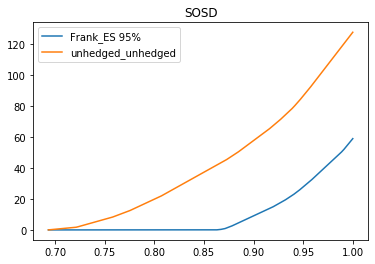

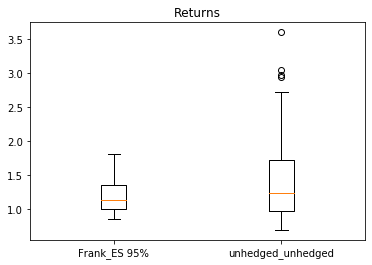

In [189]:
c1 = 'unhedged'
rm1 = 'unhedged'

c2 = 'Frank'
rm2 = 'ES 95%'

SD(c2, rm2, c1, rm1,  2, boxplot= True, lower=True)

Gumbel_ES 95% SOSD unhedged_unhedged from -inf to 1.000


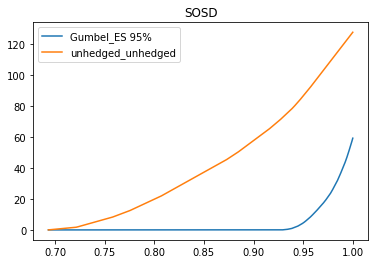

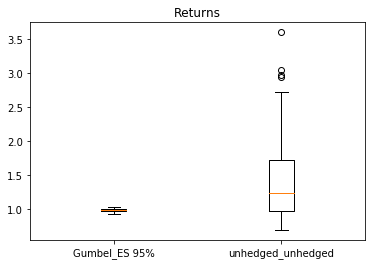

In [190]:
c1 = 'unhedged'
rm1 = 'unhedged'

c2 = 'Gumbel'
rm2 = 'ES 95%'

SD(c2, rm2, c1, rm1,  2, boxplot= True, lower=True)

Gumbel_ES 95% SOSD Gaussian_ES 95% from -inf to 0.939


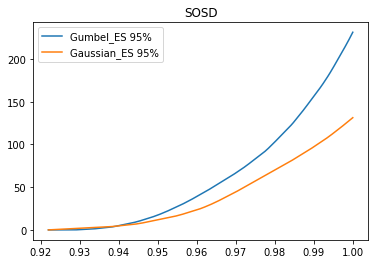

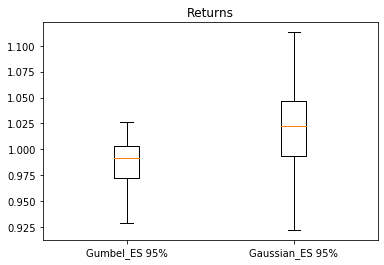

In [195]:
c1 = 'Gumbel'
rm1 = 'ES 95%'

c2 = 'Gaussian'
rm2 = 'ES 95%'

SD(c1, rm1, c2, rm2,  2, boxplot= True, lower=True)

Gumbel_Spectral 10 SOSD Gumbel_Variance from -inf to 0.949


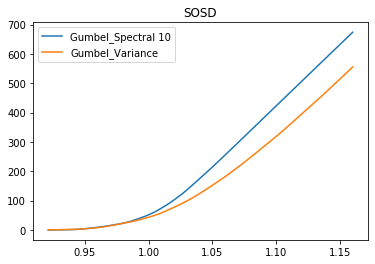

In [166]:
SD(c1, rm1, c2, rm2, 2)

Gumbel_Variance SOSD Gumbel_Spectral 10 from 0.950 to inf


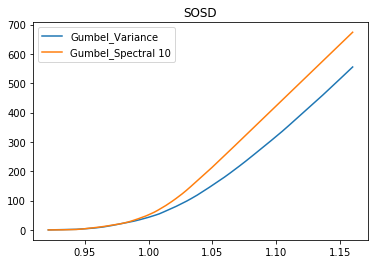

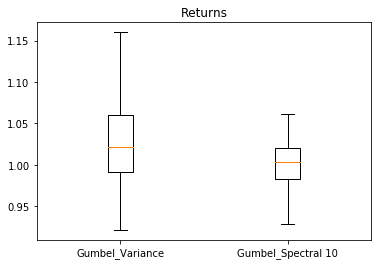

In [164]:
c1 = 'Gumbel'
rm1 = 'Variance'

c2 = 'Gumbel'
rm2 = 'Spectral 10'

SD(c1, rm1, c2, rm2,  2, boxplot= True)

Gumbel_Spectral 10 SOSD Gumbel_Variance from -inf to 0.949


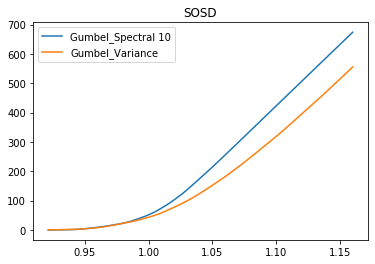

In [167]:
SD( c2, rm2, c1, rm1, 2)

In [ ]:
SD( c2, rm2, c1, rm1, 2)

Gumbel_ES 95% TOSD Frank_ES 95% from -inf to 1.042


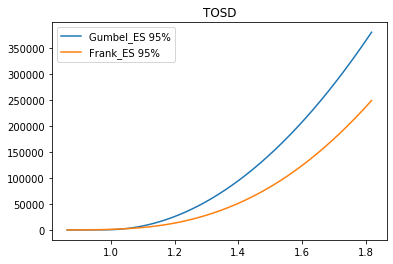

In [153]:
SD(c1, rm1, c2, rm2,  3)

In [116]:
c1 = 'Gumbel'
c2 = 'Gumbel'

rm1 = 'ES 95%'
rm2 = 'ES 99%'

r1 = np.array(results[(c1), (rm1)])
r2 = np.array(results[(c2), (rm2)])
print('     '+ c1+'_'+rm1, c2+'_'+rm2)
print('Mean', '%.4f        %.4f'%(np.mean(r1),np.mean(r2)))
print('Std ', '%.4f        %.4f'%(np.std(r1),np.std(r2)))
print('Max ', '%.4f        %.4f'%(np.max(r1),np.max(r2)))
print('UQ  ', '%.4f        %.4f'%(np.quantile(r1, 0.75),np.quantile(r2, 0.75)))
print('LQ  ', '%.4f        %.4f'%(np.quantile(r1, 0.25),np.quantile(r2, 0.25)))
print('Min ', '%.4f        %.4f'%(np.min(r1),np.min(r2)))

     Gumbel_ES 95% Gumbel_ES 99%
Mean 0.9852        0.9786
Std  0.0246        0.0384
Max  1.0266        1.0279
UQ   1.0031        1.0021
LQ   0.9722        0.9628
Min  0.9286        0.8068
